> **Name:** Shashaank Singh <br>
> **Registration Number:** 220968310 <br>
> **Roll Number:** 47 <br>
> **Batch:** A2 <br>
> **Week:** 9

## MDP & Monte Carlo Methods

### Required imports

In [9]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import pygame

Use the Cliff Walking Environment: <br>
https://gymnasium.farama.org/environments/toy_text/cliff_walking/

_Create environment:_

In [10]:
env: gym.Env = gym.make(
    "CliffWalking-v0",
)
env

<OrderEnforcing<PassiveEnvChecker<CliffWalkingEnv<CliffWalking-v0>>>>

_Reset the environment:_

In [11]:
env.reset()

(36, {'prob': 1})

_Check observation space:_

In [12]:
env.observation_space

Discrete(48)

Environment has 48 states, as it is a 4 x 12 grid. States `37` to `46` are cliffs, state `36` is start and state `47` is goal.

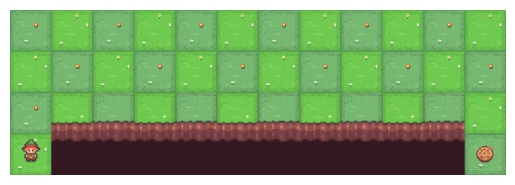

In [13]:
temp: gym.Env = gym.make("CliffWalking-v0", render_mode="rgb_array") # Create environment
temp.reset() # Reset environment
plt.axis(False) # Removes the X and Y axes
plt.imshow(temp.render()) # Display environment
del temp # Delete the temporary environment as we no longer need it

_Check action space:_

In [14]:
env.action_space

Discrete(4)

4 actions:

- `0`: Up
- `1`: Right
- `2`: Down
- `3`: Left

Learn the optimal policy using 500 episodes:

In [15]:
num_episodes: int = 1000

In [16]:
episodes: list = []

for ep in range(num_episodes):
    print(f"Running episode {ep + 1}/{num_episodes}")
    obs, _ = env.reset()
    terminated = truncated = False
    episode: list = []
    
    while not terminated and not truncated:
        state: int = obs
        action: int = env.action_space.sample() # Choose random action
        obs, reward, terminated, truncated, _ = env.step(action) # Choose action

        episode.append((state, action, reward))
    
    episodes.append(np.array(episode))

Running episode 1/1000
Running episode 2/1000
Running episode 3/1000
Running episode 4/1000
Running episode 5/1000
Running episode 6/1000
Running episode 7/1000
Running episode 8/1000
Running episode 9/1000
Running episode 10/1000
Running episode 11/1000
Running episode 12/1000
Running episode 13/1000
Running episode 14/1000
Running episode 15/1000
Running episode 16/1000
Running episode 17/1000
Running episode 18/1000
Running episode 19/1000
Running episode 20/1000
Running episode 21/1000
Running episode 22/1000
Running episode 23/1000
Running episode 24/1000
Running episode 25/1000
Running episode 26/1000
Running episode 27/1000
Running episode 28/1000
Running episode 29/1000
Running episode 30/1000
Running episode 31/1000
Running episode 32/1000
Running episode 33/1000
Running episode 34/1000
Running episode 35/1000
Running episode 36/1000
Running episode 37/1000
Running episode 38/1000
Running episode 39/1000
Running episode 40/1000
Running episode 41/1000
Running episode 42/1000
R

In [27]:
[i for i in episodes if i[-1][2] == 0]

[]

1. Monte Carlo First Visit

In [18]:
Q_fv: np.ndarray = np.zeros((env.observation_space.n, env.action_space.n))
N_fv: np.ndarray = np.zeros((env.observation_space.n, env.action_space.n), dtype="int")

for episode in episodes:
    G: float = 0.
    temp_g: np.ndarray = np.zeros((env.observation_space.n, env.action_space.n)) # Returns from each state, action pair
    temp_n: np.ndarray = np.zeros((env.observation_space.n, env.action_space.n), dtype="bool")
    for state, action, reward in reversed(episode): # Reversed because we want returns
        G += reward
        temp_g[state, action] = G
        temp_n[state, action] = True
    N_fv += temp_n # Add 1 if state exists in episode, otherwise don't
    temp: np.ndarray = (temp_g - Q_fv) / N_fv # Vectorized update rule
    temp[np.isnan(temp)] = 0 # Replace nan values with 0 cuz anything + nan = nan
    Q_fv += temp

Q_fv

/var/folders/3w/28ckyzw57s32qmdh2v_twkhc0000gn/T/ipykernel_47543/1320503832.py:13: RuntimeWarning: invalid value encountered in divide
  temp: np.ndarray = (temp_g - Q_fv) / N_fv # Vectorized update rule


array([[-6.62435821e+04, -6.64620972e+04, -6.64743469e+04,
        -6.61891479e+04],
       [-6.60136733e+04, -6.63263381e+04, -6.63526225e+04,
        -6.62496266e+04],
       [-6.56268600e+04, -6.59889869e+04, -6.60721506e+04,
        -6.58687672e+04],
       [-6.48564353e+04, -6.53322546e+04, -6.54089060e+04,
        -6.53585468e+04],
       [-6.37775856e+04, -6.42103124e+04, -6.42997930e+04,
        -6.43743105e+04],
       [-6.16360262e+04, -6.25229792e+04, -6.28947944e+04,
        -6.30716519e+04],
       [-5.84745885e+04, -5.98745042e+04, -6.05053256e+04,
        -6.03200958e+04],
       [-5.53167702e+04, -5.61943885e+04, -5.74628654e+04,
        -5.69053232e+04],
       [-4.96697162e+04, -5.11511274e+04, -5.25192612e+04,
        -5.24291732e+04],
       [-4.33085284e+04, -4.52463382e+04, -4.68737878e+04,
        -4.73303491e+04],
       [-3.58920681e+04, -3.63068421e+04, -4.03904676e+04,
        -4.17954570e+04],
       [-3.02213964e+04, -2.90815716e+04, -3.24686855e+04,
      

In [31]:
V_fv: np.ndarray = np.zeros(env.observation_space.n)
N_fv: np.ndarray = np.zeros(env.observation_space.n, dtype="int")

for episode in episodes:
    G: float = 0.
    temp_g: np.ndarray = np.zeros(env.observation_space.n) # Returns from each state, action pair
    temp_n: np.ndarray = np.zeros(env.observation_space.n, dtype="bool")
    for state, action, reward in reversed(episode): # Reversed because we want returns
        G += reward
        temp_g[state] = G
        temp_n[state] = True
    N_fv += temp_n # Add 1 if state exists in episode, otherwise don't
    temp: np.ndarray = (temp_g - V_fv) / N_fv # Vectorized update rule
    temp[np.isnan(temp)] = 0 # Replace nan values with 0 cuz anything + nan = nan
    V_fv += temp

V_fv

/var/folders/3w/28ckyzw57s32qmdh2v_twkhc0000gn/T/ipykernel_47543/3741998782.py:13: RuntimeWarning: invalid value encountered in divide
  temp: np.ndarray = (temp_g - V_fv) / N_fv # Vectorized update rule


array([-66746.93718956, -66734.58724071, -66602.65365827, -66309.58043899,
       -65781.20517036, -64802.10197007, -63522.97140683, -61411.45740705,
       -58209.99796689, -53732.03582424, -48349.89721927, -40079.29095045,
       -66956.5565004 , -66913.83443443, -66728.48598126, -66444.41898573,
       -65948.07977456, -65112.5089044 , -63867.97238991, -62049.93834285,
       -58922.53786397, -54936.13941952, -48950.1497827 , -40251.01284407,
       -67160.898     , -67055.00074152, -66810.46511948, -66391.12701689,
       -65709.84204595, -64766.88232234, -63139.3721046 , -60762.28137755,
       -57241.89192762, -53031.37721843, -46976.32600678, -31565.304     ,
       -67266.48      ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ])

2. Monte Carlo Every Visit

In [12]:
Q_ev: np.ndarray = np.zeros((env.observation_space.n, env.action_space.n))
N_ev: np.ndarray = np.zeros((env.observation_space.n, env.action_space.n), dtype="int")

for episode in episodes:
    G: float = 0.
    for state, action, reward in reversed(episode): # Reversed because we want returns
        G += reward
        N_ev[state, action] += 1
        Q_ev[state, action] += (G - Q_ev[state, action]) / N_ev[state, action]

Q_ev

array([[-6.67606764e+04, -6.67726847e+04, -6.72875401e+04,
        -6.71912853e+04],
       [-6.71889624e+04, -6.66858764e+04, -6.71480721e+04,
        -6.66517346e+04],
       [-6.65462822e+04, -6.63914087e+04, -6.71747450e+04,
        -6.69846259e+04],
       [-6.62527311e+04, -6.60101190e+04, -6.65569183e+04,
        -6.68761024e+04],
       [-6.72010444e+04, -6.58570306e+04, -6.73809295e+04,
        -6.63763646e+04],
       [-6.65537206e+04, -6.48477563e+04, -6.60348628e+04,
        -6.73586938e+04],
       [-6.44364674e+04, -6.30319336e+04, -6.46246759e+04,
        -6.65795169e+04],
       [-6.26198225e+04, -6.14216100e+04, -6.40302863e+04,
        -6.51454361e+04],
       [-6.27696941e+04, -5.78205884e+04, -6.26766868e+04,
        -6.34569093e+04],
       [-5.85204840e+04, -5.40998329e+04, -5.94740077e+04,
        -6.12498353e+04],
       [-5.36595311e+04, -5.01188608e+04, -5.54938419e+04,
        -5.91622017e+04],
       [-5.17045763e+04, -4.96381816e+04, -4.61317850e+04,
      

In [24]:
episodes[0][-1][0] == 47

np.False_

_The `Q` contains the optimal policy. For a given state, the action is chosen by picking the one with the highest `Q` value._

_Testing policies:_

In [27]:
obs, _ = env.reset()
obs

36

In [134]:
np.where(-Q_fv[obs] == (-Q_fv[obs]).max())[0]

array([1])

In [131]:
-Q_fv[obs]

array([70836.978     , 70896.62      , 70786.84      , 70788.76064994])

In [47]:
action = np.random.choice(np.where((Q_ev[obs]) == (Q_ev[obs]).max())[0])
print("Action:", action)
info = env.step(action)
obs = info[0]
info

Action: 0


(0, -1, False, False, {'prob': 1.0})

In [101]:
obs = env.step(0)[0]

_Close the environment:_

In [48]:
env.close()